# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    country_code = city.country_code
    
    # If the city is unique, then add it to a our cities list
    if city_name not in cities:
        cities.append(city_name)
        country_codes.append(country_code)

# Print the city count to confirm sufficient count
len(cities)
#print(cities[403])

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
#url 
base_url = "http://api.openweathermap.org/data/2.5/weather"

#lists for the future data
cities_data = []
country_data = []
lat = []
lng = []
date = []
temps = []
humidity = []
cloudiness = []
wind_speed = []

#set counters
record = 1
sets = 1
count = 1

#retrieve from api
print("Begin Data Retrieval")
print("==============================") 

for city_name in cities:
    #create a dictionary for the call
    format = {
        "q": (city_name),
        "units": "imperial",
        "mode": "json",
        "appid": weather_api_key
    
    }
    #set the query to api site, include format, run loop through cities
    query = "http://api.openweathermap.org/data/2.5/weather"
    response = requests.get(query, params = format).json()
    try:
        
        cities_data.append(response["name"])
        country_data.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        date.append(response["dt"])
        temps.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processed {city_name} || Record#/Set# {record}/{sets}")
        record = record +1
        count = count+1
    except:
        print("Not Found ----> Skip To Next City")
        count = count +1
    if count == 60:
        sets = sets +1
        count = 1
        pass
print("===============================================")
print("City Data Updated and Complete")

Begin Data Retrieval
Processed pochutla || Record#/Set# 1/1
Processed floresta || Record#/Set# 2/1
Not Found ----> Skip To Next City
Not Found ----> Skip To Next City
Processed arraial do cabo || Record#/Set# 3/1
Processed jumla || Record#/Set# 4/1
Processed victoria || Record#/Set# 5/1
Processed esperance || Record#/Set# 6/1
Processed wuda || Record#/Set# 7/1
Processed sao joao da barra || Record#/Set# 8/1
Processed rovaniemi || Record#/Set# 9/1
Processed ribeira grande || Record#/Set# 10/1
Processed souillac || Record#/Set# 11/1
Processed hilo || Record#/Set# 12/1
Processed champerico || Record#/Set# 13/1
Processed ushuaia || Record#/Set# 14/1
Processed amahai || Record#/Set# 15/1
Processed saint george || Record#/Set# 16/1
Processed lock haven || Record#/Set# 17/1
Processed east london || Record#/Set# 18/1
Processed puerto ayora || Record#/Set# 19/1
Processed black diamond || Record#/Set# 20/1
Processed broome || Record#/Set# 21/1
Processed barrow || Record#/Set# 22/1
Not Found ----

Processed lavrentiya || Record#/Set# 185/4
Processed cururupu || Record#/Set# 186/4
Processed nantucket || Record#/Set# 187/4
Not Found ----> Skip To Next City
Processed bowen || Record#/Set# 188/4
Processed aykhal || Record#/Set# 189/4
Processed vilhena || Record#/Set# 190/4
Not Found ----> Skip To Next City
Processed bintulu || Record#/Set# 191/4
Processed marquette || Record#/Set# 192/4
Processed la maddalena || Record#/Set# 193/4
Processed saint-philippe || Record#/Set# 194/4
Processed povarovo || Record#/Set# 195/4
Processed cabo san lucas || Record#/Set# 196/4
Processed tomatlan || Record#/Set# 197/4
Processed biak || Record#/Set# 198/4
Processed santa clara || Record#/Set# 199/4
Processed beringovskiy || Record#/Set# 200/4
Processed san andres || Record#/Set# 201/4
Processed nikolskoye || Record#/Set# 202/4
Processed dingle || Record#/Set# 203/4
Processed gamba || Record#/Set# 204/4
Processed nanpiao || Record#/Set# 205/4
Processed owensboro || Record#/Set# 206/4
Processed marsh

Processed havelock || Record#/Set# 378/7
Not Found ----> Skip To Next City
Processed srednekolymsk || Record#/Set# 379/7
Processed bronzani majdan || Record#/Set# 380/7
Processed richards bay || Record#/Set# 381/7
Processed surgana || Record#/Set# 382/7
Processed birin || Record#/Set# 383/7
Processed karpogory || Record#/Set# 384/8
Not Found ----> Skip To Next City
Processed tarko-sale || Record#/Set# 385/8
Processed binga || Record#/Set# 386/8
Processed karakol || Record#/Set# 387/8
Processed mount darwin || Record#/Set# 388/8
Processed ondarroa || Record#/Set# 389/8
Processed bengkulu || Record#/Set# 390/8
Processed aripuana || Record#/Set# 391/8
Not Found ----> Skip To Next City
Processed vanimo || Record#/Set# 392/8
Not Found ----> Skip To Next City
Not Found ----> Skip To Next City
Processed the valley || Record#/Set# 393/8
Processed loreto || Record#/Set# 394/8
Processed yuncheng || Record#/Set# 395/8
Processed batemans bay || Record#/Set# 396/8
Processed palmer || Record#/Set# 3

Processed abaete || Record#/Set# 561/11
Processed summerville || Record#/Set# 562/11
Processed severnoye || Record#/Set# 563/11
Processed valleyview || Record#/Set# 564/11
Processed kununurra || Record#/Set# 565/11
Processed tambun || Record#/Set# 566/11
Processed erzin || Record#/Set# 567/11
City Data Updated and Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [132]:
#put into dict
weather = {
    "city": cities_data,
    "country": country_data,
    "lat": lat,
    "lng": lng,
    "date": date,
    "temp": temps,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
}

#convert dict into df
weather_df = pd.DataFrame(weather)

#save as CSV
weather_df.to_csv("Outputs/CSV/weather_ouput.csv", encoding = "utf-8", index = False)

weather_df

,city,country,lat,lng,date,temp,humidity,cloudiness,wind_speed
0,Pochutla,MX,15.74,-96.47,1583820944,77.00,67,0,12.75
1,Floresta,BR,-8.60,-38.57,1583820944,74.32,82,91,5.99
2,Arraial do Cabo,BR,-22.97,-42.03,1583820945,75.76,85,0,10.80
3,Jumla,NP,29.27,82.18,1583820945,60.01,92,0,5.46
4,Hong Kong,HK,22.29,114.16,1583820877,76.95,56,20,19.46
...,...,...,...,...,...,...,...,...,...
562,Severnoye,RU,56.35,78.36,1583821298,16.00,88,91,7.90
563,Valleyview,CA,55.07,-117.29,1583821298,19.60,80,0,6.49
564,Kununurra,AU,-15.77,128.73,1583821298,98.60,25,0,6.93
565,Tambun,ID,-6.26,107.07,1583821299,93.74,52,40,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

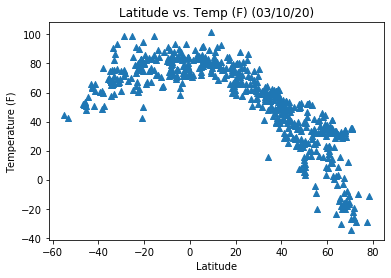

In [27]:
plt.scatter(weather_df["lat"], weather_df["temp"], marker = "^")
plt.title("Latitude vs. Temp (F) (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Outputs/PNGs/LATvsTEMP.png")
plt.show()

This plot illustrates the relationship between latitude and the current Temperature in degrees fahrenheit for a given city.  Given that latitude runs E-W, with zero (0) being the equator, it is easy to understand this plot.  As you get nearer to the equator (closer to zero latitude) the temperature steadily increases.  The farther you are from the equator, towards -60 or +80, the temperature decreases, as is expected.

#### Latitude vs. Humidity Plot

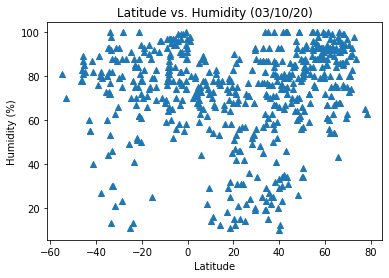

In [29]:
plt.scatter(weather_df["lat"], weather_df["humidity"], marker = "^")
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Outputs/PNGs/LATvsHUMID.png")
plt.show()

 This plot shows the relationship between latitude and humidty.  It appears that that regardless of latitude, a majority of cities tend to be above 60% humidity, however at and around the equator, there are no cities below ~50% humidty.  This is expected as regions in this latitude tend to be associated with rainforest type climates.

#### Latitude vs. Cloudiness Plot

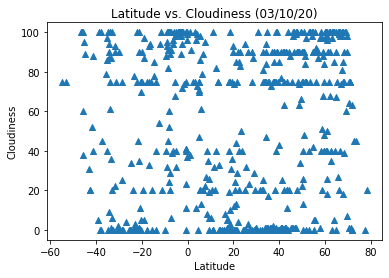

In [31]:
plt.scatter(weather_df["lat"], weather_df["cloudiness"], marker = "^")
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Outputs/PNGs/LATvsCLOUD.png")
plt.show()

This plot shows the relationship between Cloud Cover and latitude. It appears that regardless of latitude, cloud cover appears to be random, indicating latitude does not affect the cloud cover for a given city.  Perhaps with data taken over time, as opposed to a singular point/day, a trend would appear linking geographic latitude with increased or decreased clouds.  

#### Latitude vs. Wind Speed Plot

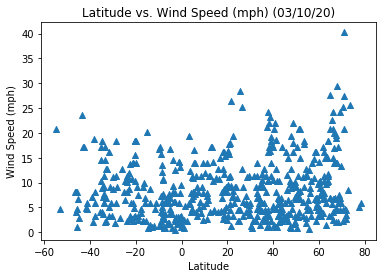

In [33]:
plt.scatter(weather_df["lat"], weather_df["wind_speed"], marker = "^")
plt.title("Latitude vs. Wind Speed (mph) (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Outputs/PNGs/LATvsWIND.png")
plt.show()

The final plot illustrates the relationship of latitude and wind speed.  It appears fairly random, however it appears teh farther north or south you go, there is an increase in windspeed. Again, this data overtime would give more valuable insights into if regions have consistently higher winds than others.  It also does not take into account elevation, which historically, higher elevation relates to higher windspeeds.  

## Linear Regression

In [ ]:
#OPTIONAL: Create a function to create Linear Regression plots
#GENERAL OUTLINE FOR LINREGRESS ADDITION
#x_values = df['X']
#y_values = df['Y']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#print(line_eq) 

In [122]:
# Create Northern and Southern Hemisphere DataFrames
NH = weather_df[weather_df['lng'] >= 0] &
SH = weather_df[weather_df['lat'] < 0]

#print(NH.dtypes)
#print(SH.dtypes)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

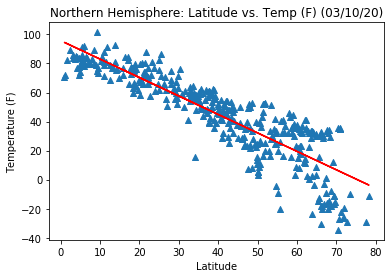

y = -1.27x + 95.78


In [123]:
x_values = NH['lat']
y_values = NH['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "^")
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere: Latitude vs. Temp (F) (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Outputs/PNGs/NH_LATvsTEMP.png")
plt.show()
print(line_eq)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

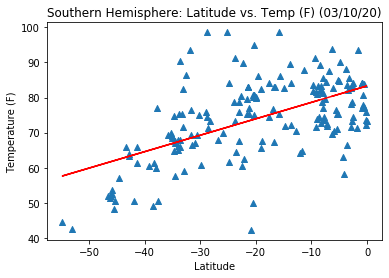

y = 0.47x + 83.32


In [124]:
x_values = SH['lat']
y_values = SH['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "^")
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere: Latitude vs. Temp (F) (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Outputs/PNGs/SH_LATvsTEMP.png")
plt.show()
print(line_eq)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

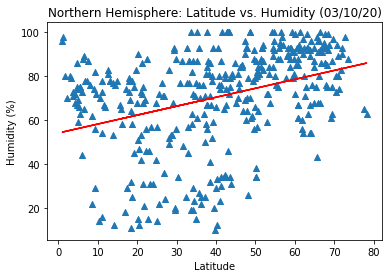

y = 0.41x + 54.13


In [125]:
x_values = NH['lat']
y_values = NH['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "^")
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere: Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")
plt.savefig("Outputs/PNGs/NH_LATvsHUMID.png")
plt.show()
print(line_eq)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

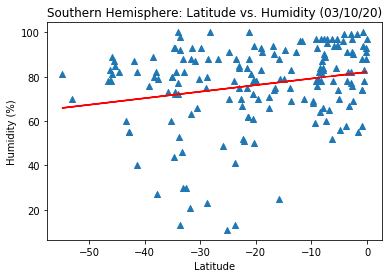

y = 0.3x + 82.12


In [126]:
x_values = SH['lat']
y_values = SH['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "^")
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere: Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Outputs/PNGs/SH_LATvsHUMID.png")
plt.show()
print(line_eq)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

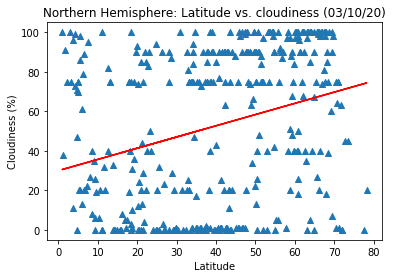

y = 0.57x + 29.99


In [127]:
x_values = NH['lat']
y_values = NH['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "^")
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere: Latitude vs. cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Outputs/PNGs/NH_LATvsCLOUD.png")
plt.show()
print(line_eq)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

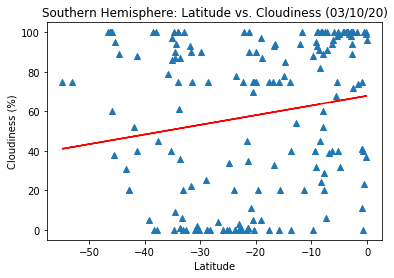

y = 0.49x + 67.84


In [128]:
x_values = SH['lat']
y_values = SH['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "^")
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Outputs/PNGs/SH_LATvsCLOUD.png")
plt.show()
print(line_eq)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

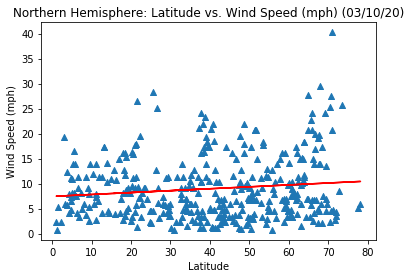

y = 0.04x + 7.44


In [129]:
x_values = NH['lat']
y_values = NH['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "^")
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed (mph) (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Outputs/PNGs/NH_LATvsWIND.png")
plt.show()
print(line_eq)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

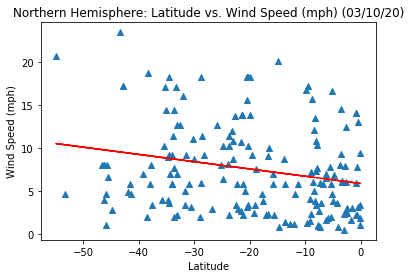

y = -0.09x + 5.87


In [130]:
x_values = SH['lat']
y_values = SH['wind_speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker = "^")
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed (mph) (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Outputs/PNGs/SH_LATvsWIND.png")
plt.show()
print(line_eq)